In [127]:
## Preâmbulo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [128]:
# Seed
random.seed(1603)

In [129]:
data = pd.read_excel(
    'C:/Users/jpzam/Desktop/case_DHAUZ/Travel_Chalenge.xlsx'
)

data.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
0,Air Seychelles,8,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CityJet,1,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Shanghai Airlines,9,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,4.0,NaN,2.0,NaN
3,Aerolineas Argentinas,8,Aerolineas Argentinas customer review,10th April 2014,Rio to Buenos Aires AEP on 737. Departure dela...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,0.0,NaN,0.0,NaN
4,Adria Airways,7,Adria Airways customer review,10th April 2015,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,NaN,0.0,NaN


#### 1. Processamento Básico para Remoção de reviews duplicadas e remoção de NAs iniciais

In [130]:
## Criando uma coluna que concatena "Airline Name" com "Review" para evidenciar duplicatas.

data['concat'] = data['Airline Name'] + data['Review']

#data.head(2)

data['concat'].value_counts() 
## Ainda que dificil de Ver, fica evidented que há alguma duplicadas que iremos droppar.

LuxairI was impressed with LUXAIR. My flights were on-time and the FAs were great. CDG to LUX EMBRAER RJ145. Typical commuter terminal set-up. Take a bus to get there. Boarded from the tarmac. Reminds me of LAX. Plane has 1x2 seating. Fancy turquoise and black flight attendant uniforms for such a short flight in a small aircraft. Plane did have a special 2005 EU Presidency decal outside the cabin hatch. Lovely little brunch service. China and stamped metal flatware. Fruit cup rye roll croissant cute soufflÃ© thing on a toast mozzarella bacon. Got a box of two chocolates at the end. Unfortunately my checked bags weren't there. I wasn't the only one to groan when the baggage carousel stopped without barfing out my bag. The checked bag arrived over 5 hours after I did. LUX to FRA Boeing 737-500. Nice Luxair VIP lounge. It's got a self serve espresso machine that grinds the beans fresh and dried fruit packaged snacks cute little sandwiches and bottled drinks. Plane is interesting. First cl

In [131]:
data.drop_duplicates(subset = 'concat', inplace = True)

data['concat'].value_counts() ## Não há mais duplicadas

Air SeychellesLHR-SEZ-LHR. It's true that there aren't personal TVs like on Virgin or BA but this wasn't particularly important to me - I'd rather read a book. The food was tasty and drinks are free. My only niggle is that it wasn't that clear that we would be stopping.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [132]:
data['Overall_Rating'].value_counts()

1    9369
2    1873
9    1292
8    1251
3    1047
7     840
4     606
5     600
6     487
n     305
Name: Overall_Rating, dtype: int64

In [133]:
## Substituindo 'n' por np.NaN

data['Overall_Rating'] = data['Overall_Rating'].replace('n', np.nan)

data['Overall_Rating'] = data['Overall_Rating'].astype(float)

data.dropna(subset = 'Overall_Rating')

data.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,concat
0,Air Seychelles,8.0,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air SeychellesLHR-SEZ-LHR. It's true that ther...
1,CityJet,1.0,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CityJetLondon City to Antwerp was delayed 3 ho...
2,Shanghai Airlines,9.0,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,4.0,NaN,2.0,NaN,Shanghai AirlinesPEK to HGH in Economy. Slight...
3,Aerolineas Argentinas,8.0,Aerolineas Argentinas customer review,10th April 2014,Rio to Buenos Aires AEP on 737. Departure dela...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,0.0,NaN,0.0,NaN,Aerolineas ArgentinasRio to Buenos Aires AEP o...
4,Adria Airways,7.0,Adria Airways customer review,10th April 2015,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,NaN,0.0,NaN,Adria AirwaysOutbound flight FRA/PRN A319. 2 h...


In [134]:
## Verificando itens faltantes em colunas relevante à analise.
    # i.e. "Aircraft" e "Companhias" não preenchidas.
    # Eventualmente isto será feito também para as colunas no momento de correlação, mas por hora, somente dropparei NAs nestas duas.

airline_na = data['Airline Name'].isna().sum()
aircraft_na = data['Aircraft'].isna().sum()

print(
    [f'airline_na = {airline_na}', f'aircraft_na = {aircraft_na}']
)

## Droppando, portanto, os NAs de Aircraft_na para facilitar a análise da Avaliação por Airline e Aicraft.

data_dropped = data.dropna(subset = 'Aircraft')

airline_na_dropped = data_dropped['Airline Name'].isna().sum()
aircraft_na_dropped = data_dropped['Aircraft'].isna().sum()

print(
    [f'airline_na_dropped = {airline_na_dropped}', f'aircraft_na_dropped = {aircraft_na_dropped}']
)


['airline_na = 0', 'aircraft_na = 12006']
['airline_na_dropped = 0', 'aircraft_na_dropped = 0']


#### 2. Processamento de Liguagem Natural (NLP)

In [135]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk

#nltk.download('all')

In [136]:
def tokenizar_lemmatizar(text):

    # Pontuação
    pontuacoes = [':',';',',','.','!','?','-']

    ## Tokenização
    tokens = word_tokenize(text.lower())

    ## Removendo stop-words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english') and token not in pontuacoes]

    ## Lemmatizando os tokens
    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [137]:
# Selecionando no Dataset "Data" somente as colunas Review e Review Title

df_reviews = data[['Airline Name','Overall_Rating','Review_Title','Review']]

df_reviews.head()

,Airline Name,Overall_Rating,Review_Title,Review
0,Air Seychelles,8.0,Air Seychelles customer review,LHR-SEZ-LHR. It's true that there aren't perso...
1,CityJet,1.0,CityJet customer review,London City to Antwerp was delayed 3 hours 40 ...
2,Shanghai Airlines,9.0,Shanghai Airlines customer review,PEK to HGH in Economy. Slight delay out of PEK...
3,Aerolineas Argentinas,8.0,Aerolineas Argentinas customer review,Rio to Buenos Aires AEP on 737. Departure dela...
4,Adria Airways,7.0,Adria Airways customer review,Outbound flight FRA/PRN A319. 2 hours 10 min f...


In [138]:
df_tokens = df_reviews.copy()

df_tokens['tokens_title'] = df_tokens['Review_Title'].apply(tokenizar_lemmatizar)

df_tokens['tokens_fullreview'] = df_tokens['Review'].apply(tokenizar_lemmatizar)

In [139]:
df_tokens.head()

,Airline Name,Overall_Rating,Review_Title,Review,tokens_title,tokens_fullreview
0,Air Seychelles,8.0,Air Seychelles customer review,LHR-SEZ-LHR. It's true that there aren't perso...,air seychelles customer review,lhr-sez-lhr 's true n't personal tv like virgi...
1,CityJet,1.0,CityJet customer review,London City to Antwerp was delayed 3 hours 40 ...,cityjet customer review,london city antwerp delayed 3 hour 40 min sure...
2,Shanghai Airlines,9.0,Shanghai Airlines customer review,PEK to HGH in Economy. Slight delay out of PEK...,shanghai airline customer review,pek hgh economy slight delay pek otherwise une...
3,Aerolineas Argentinas,8.0,Aerolineas Argentinas customer review,Rio to Buenos Aires AEP on 737. Departure dela...,aerolineas argentina customer review,rio buenos aire aep 737. departure delayed 30m...
4,Adria Airways,7.0,Adria Airways customer review,Outbound flight FRA/PRN A319. 2 hours 10 min f...,adria airway customer review,outbound flight fra/prn a319 2 hour 10 min fli...


In [140]:
## Criando df para Title e Review Full

df_title = df_tokens[['Overall_Rating','tokens_title']].reset_index().drop(columns = ['index'])

df_fullreview = df_tokens[['Airline Name','Overall_Rating','tokens_fullreview']].reset_index().drop(columns = ['index'])

In [141]:
df_fullreview.head()

,Airline Name,Overall_Rating,tokens_fullreview
0,Air Seychelles,8.0,lhr-sez-lhr 's true n't personal tv like virgi...
1,CityJet,1.0,london city antwerp delayed 3 hour 40 min sure...
2,Shanghai Airlines,9.0,pek hgh economy slight delay pek otherwise une...
3,Aerolineas Argentinas,8.0,rio buenos aire aep 737. departure delayed 30m...
4,Adria Airways,7.0,outbound flight fra/prn a319 2 hour 10 min fli...


In [142]:
## E com isso, finalizamos aqui o Step 2. de tratamento de dados para Processamento de Linguagem Natural

#### 3. Exploração dos Dados (EDA)

##### a. Fazendo gráficos para verificar a distribuição de Overall_rating por Companhia aéreas

In [143]:
## Fazendo o gráficos de Overall_Rating por "Airline Name"
    # Para este, utilizaremos apenas 'data', que está sem duplicadas.

data.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,concat
0,Air Seychelles,8.0,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air SeychellesLHR-SEZ-LHR. It's true that ther...
1,CityJet,1.0,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CityJetLondon City to Antwerp was delayed 3 ho...
2,Shanghai Airlines,9.0,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,4.0,NaN,2.0,NaN,Shanghai AirlinesPEK to HGH in Economy. Slight...
3,Aerolineas Argentinas,8.0,Aerolineas Argentinas customer review,10th April 2014,Rio to Buenos Aires AEP on 737. Departure dela...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,0.0,NaN,0.0,NaN,Aerolineas ArgentinasRio to Buenos Aires AEP o...
4,Adria Airways,7.0,Adria Airways customer review,10th April 2015,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,4.0,NaN,0.0,NaN,Adria AirwaysOutbound flight FRA/PRN A319. 2 h...


In [144]:
## Agrupando as médias e ordenando pelas maiores.
data_grouped = data.groupby('Airline Name')['Overall_Rating'].median().reset_index().sort_values(by = 'Overall_Rating', ascending = False).reset_index(drop = True)

data_grouped.head()

,Airline Name,Overall_Rating
0,China Southern Airlines,8.0
1,QantasLink,8.0
2,Bulgaria Air,7.0
3,Dragonair,7.0
4,Lao Airlines,7.0


In [145]:
len(data_grouped['Overall_Rating']) # Divisível por 7; Dividirei o gráfico em 7 plots

182

In [146]:
## Criando uma ordem pela média do dataframe para plotar de maneira ordenada
ordem = data_grouped['Airline Name'].tolist()

print(ordem)

# Splitando a lista ordem para usar no .isin()
split_ordem = np.array_split(ordem, 7)

print(split_ordem[0])

['China Southern Airlines', 'QantasLink', 'Bulgaria Air', 'Dragonair', 'Lao Airlines', 'Royal Brunei Airlines', 'BA CityFlyer', 'Croatia Airlines', 'China Airlines', 'Firefly', 'Virgin Australia', 'Hong Kong Airlines', 'Adria Airways', 'SilkAir', 'Air Dolomiti', 'Olympic Air', 'Luxair', 'Thomson Airways', 'Uzbekistan Airways', 'Bangkok Airways', 'Tigerair', 'Asiana Airlines', 'Tunisair', 'TAM Airlines', 'Xiamen Airlines', 'Air Namibia', 'Germanwings', 'Singapore Airlines', 'Korean Air', 'Shanghai Airlines', 'Air Mauritius', 'LAN Airlines', 'PLAY', 'Rwandair', 'Meridiana', 'Thai Smile Airways', 'Cathay Pacific Airways', 'EVA Air', 'Onur Air', 'Cubana Airlines', 'Qatar Airways', 'Thai Airways', 'Monarch Airlines', 'Vietnam Airlines', 'AirAsia X', 'Aerolineas Argentinas', 'South African Airways', 'Air France', 'Air China', 'Emirates', 'Ethiopian Airlines', 'Regional Express', 'Fiji Airways', 'Edelweiss Air', 'Japan Airlines', 'Virgin America', 'SmartWings', 'Air India Express', 'Air Tahit

In [147]:
# Loop para criar um dicionário de DataFrames por split
dict_dataframes = {}

for i in range(len(split_ordem)):
    dict_dataframes[f'data_split_{i}'] = data[data['Airline Name'].isin(split_ordem[i])]

In [148]:
list(dict_dataframes.keys()) # Estes são os dataframes criados.

['data_split_0',
 'data_split_1',
 'data_split_2',
 'data_split_3',
 'data_split_4',
 'data_split_5',
 'data_split_6']

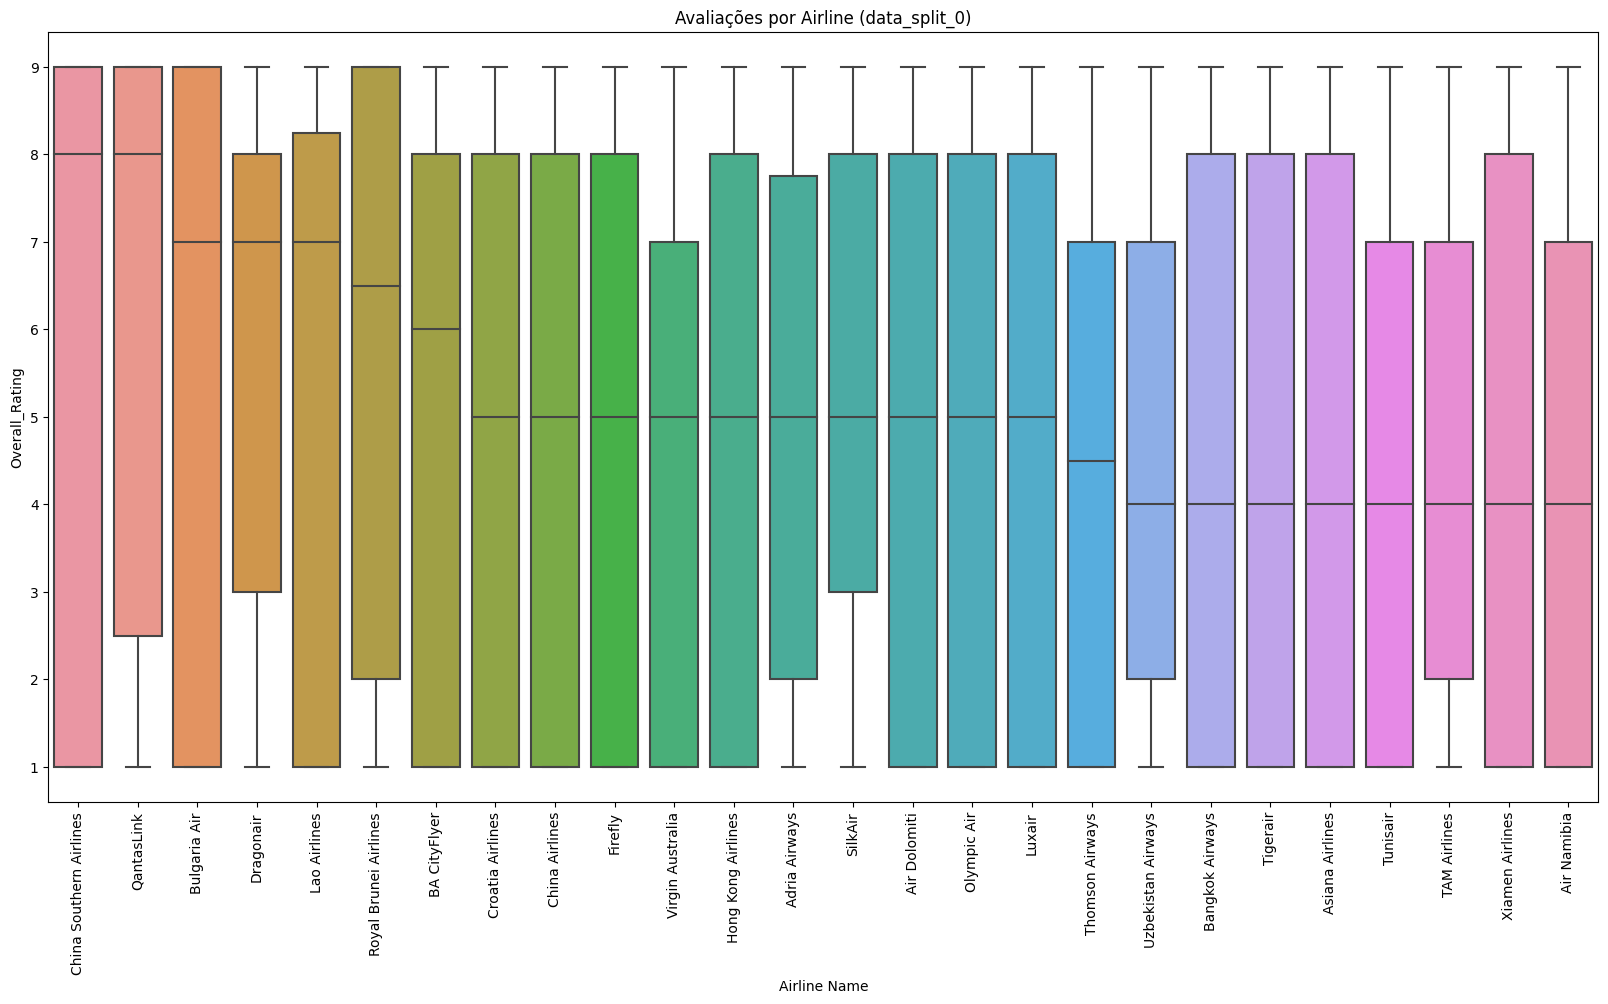

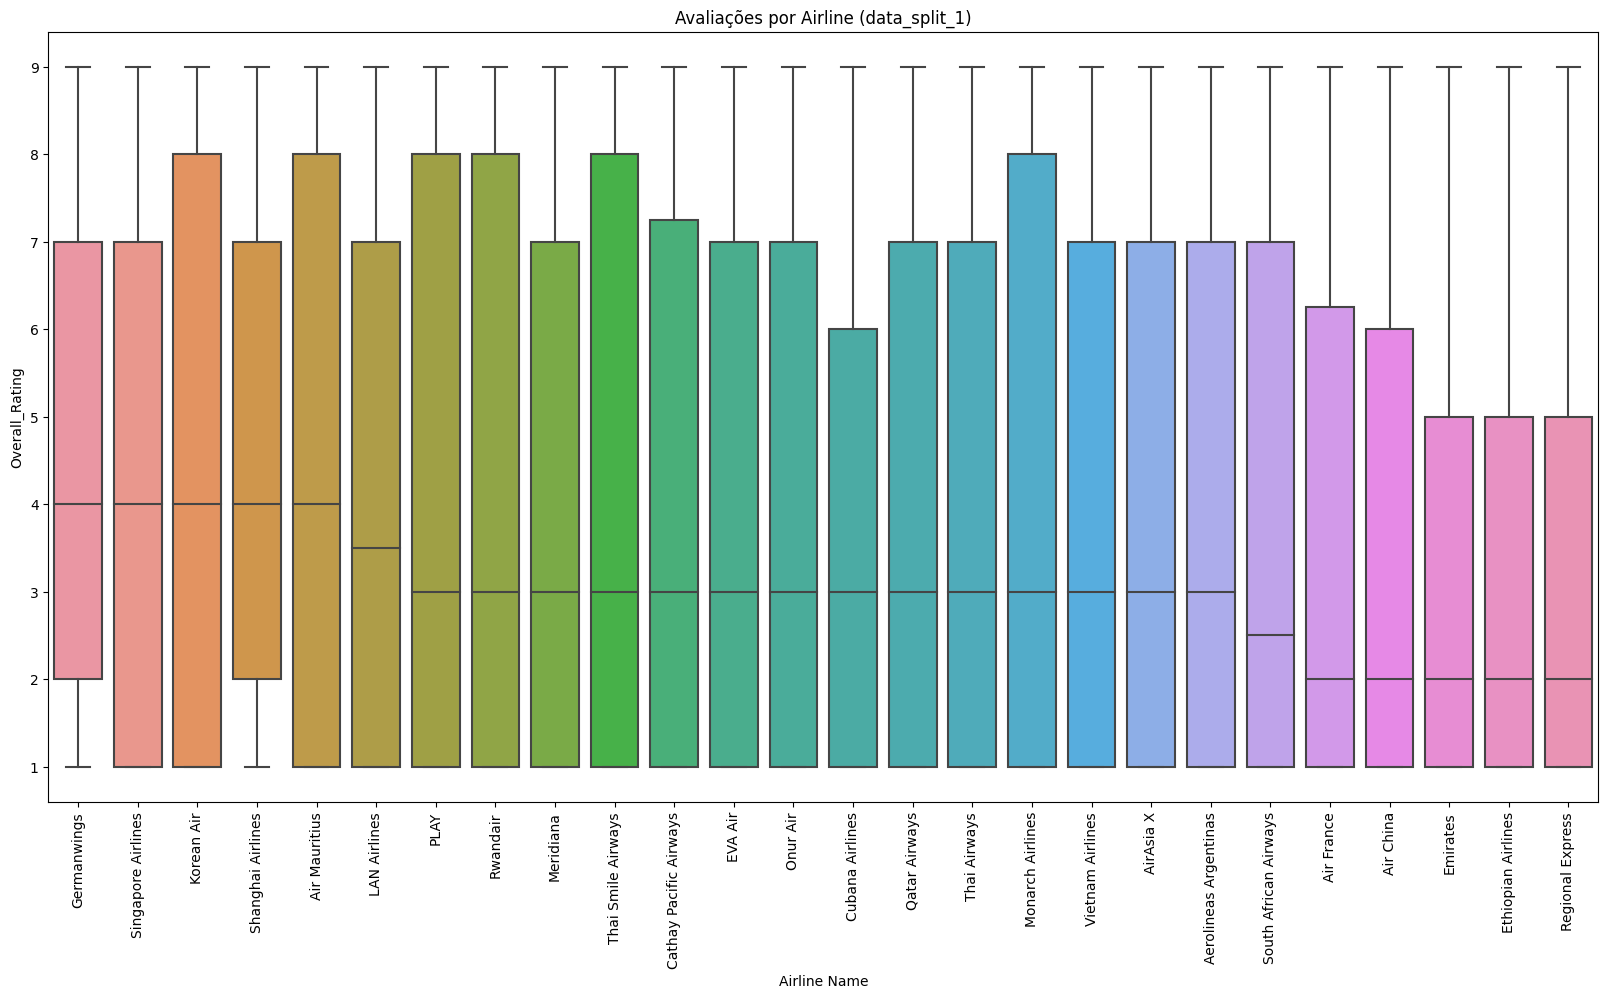

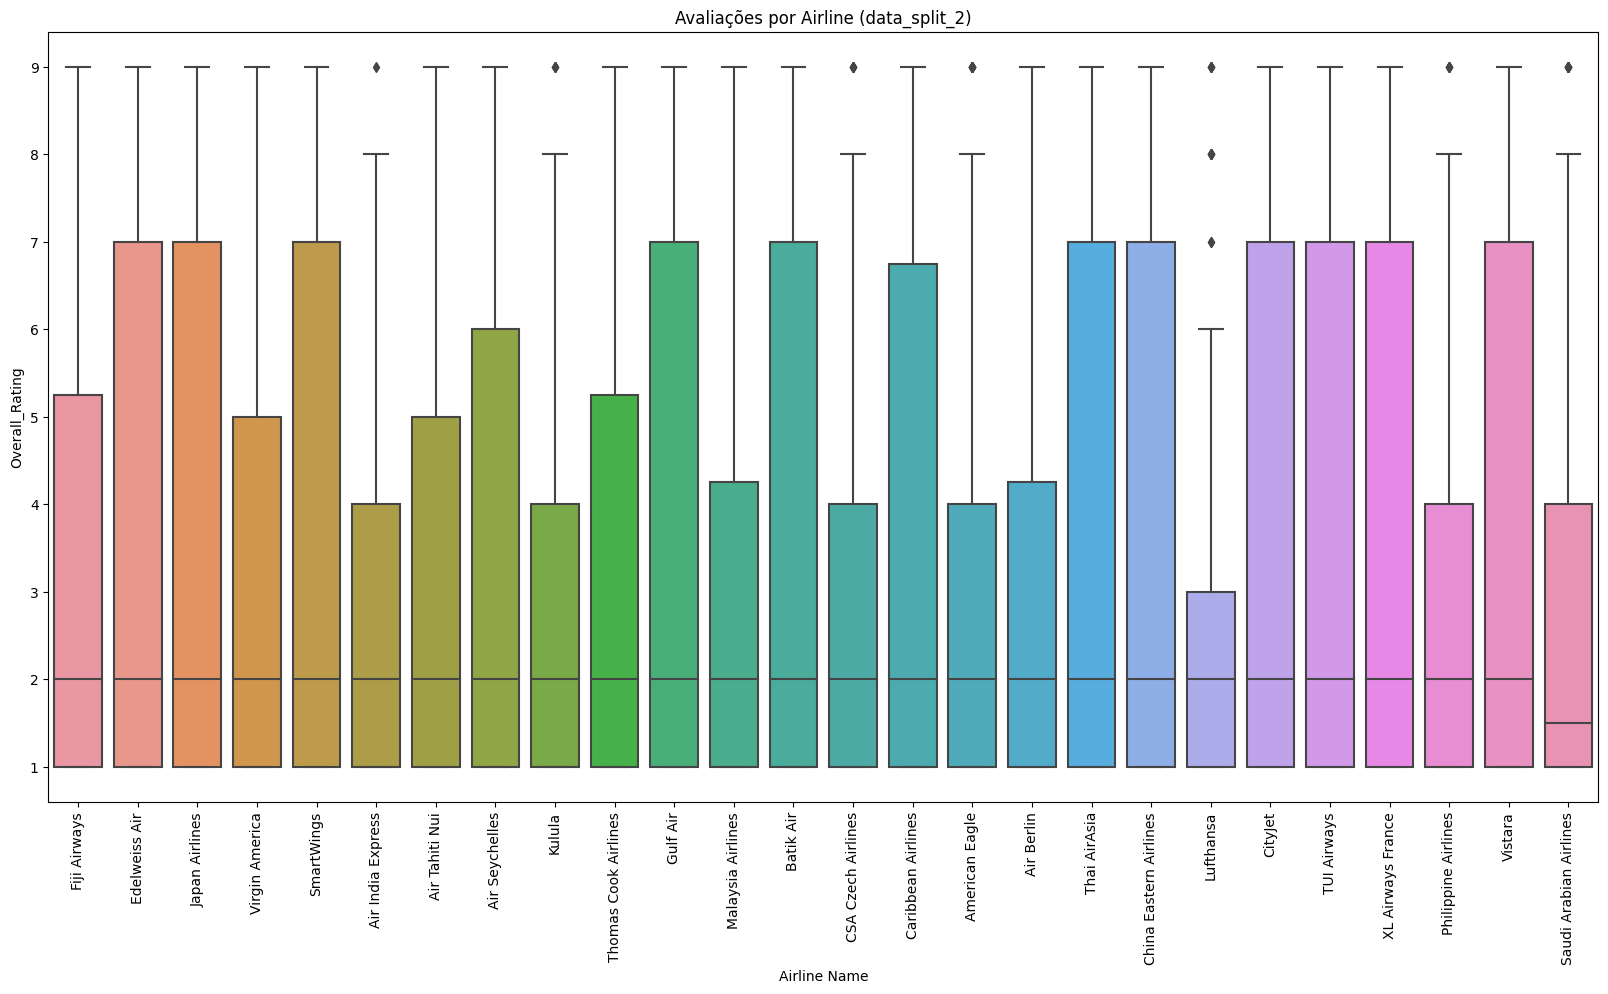

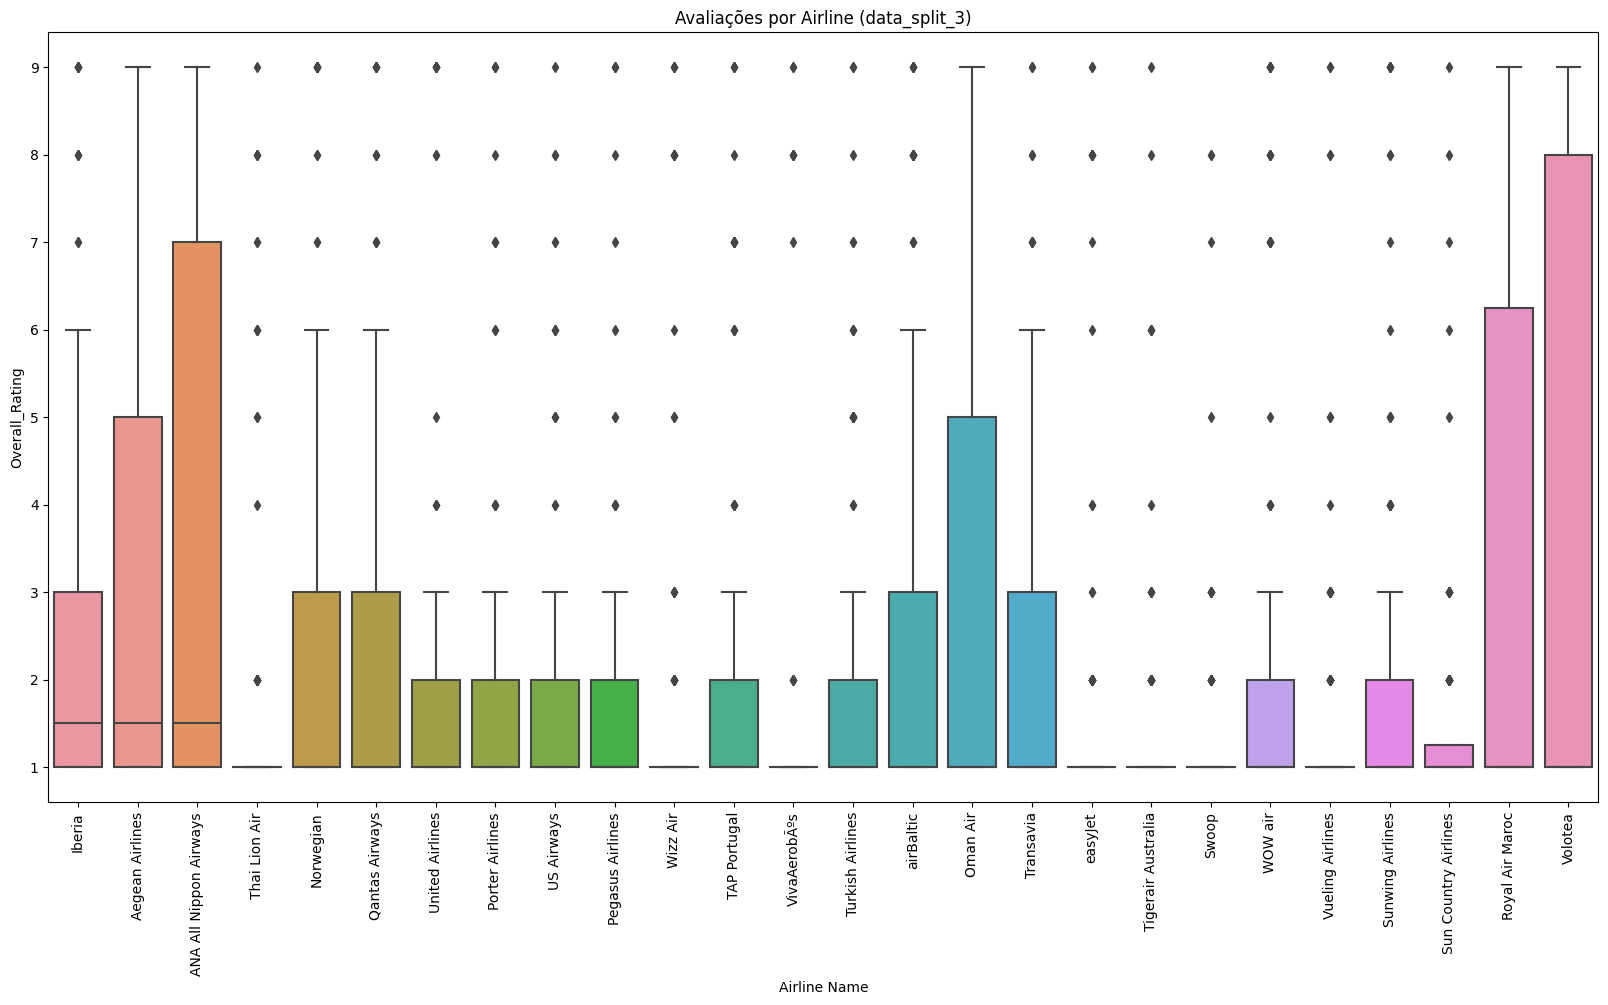

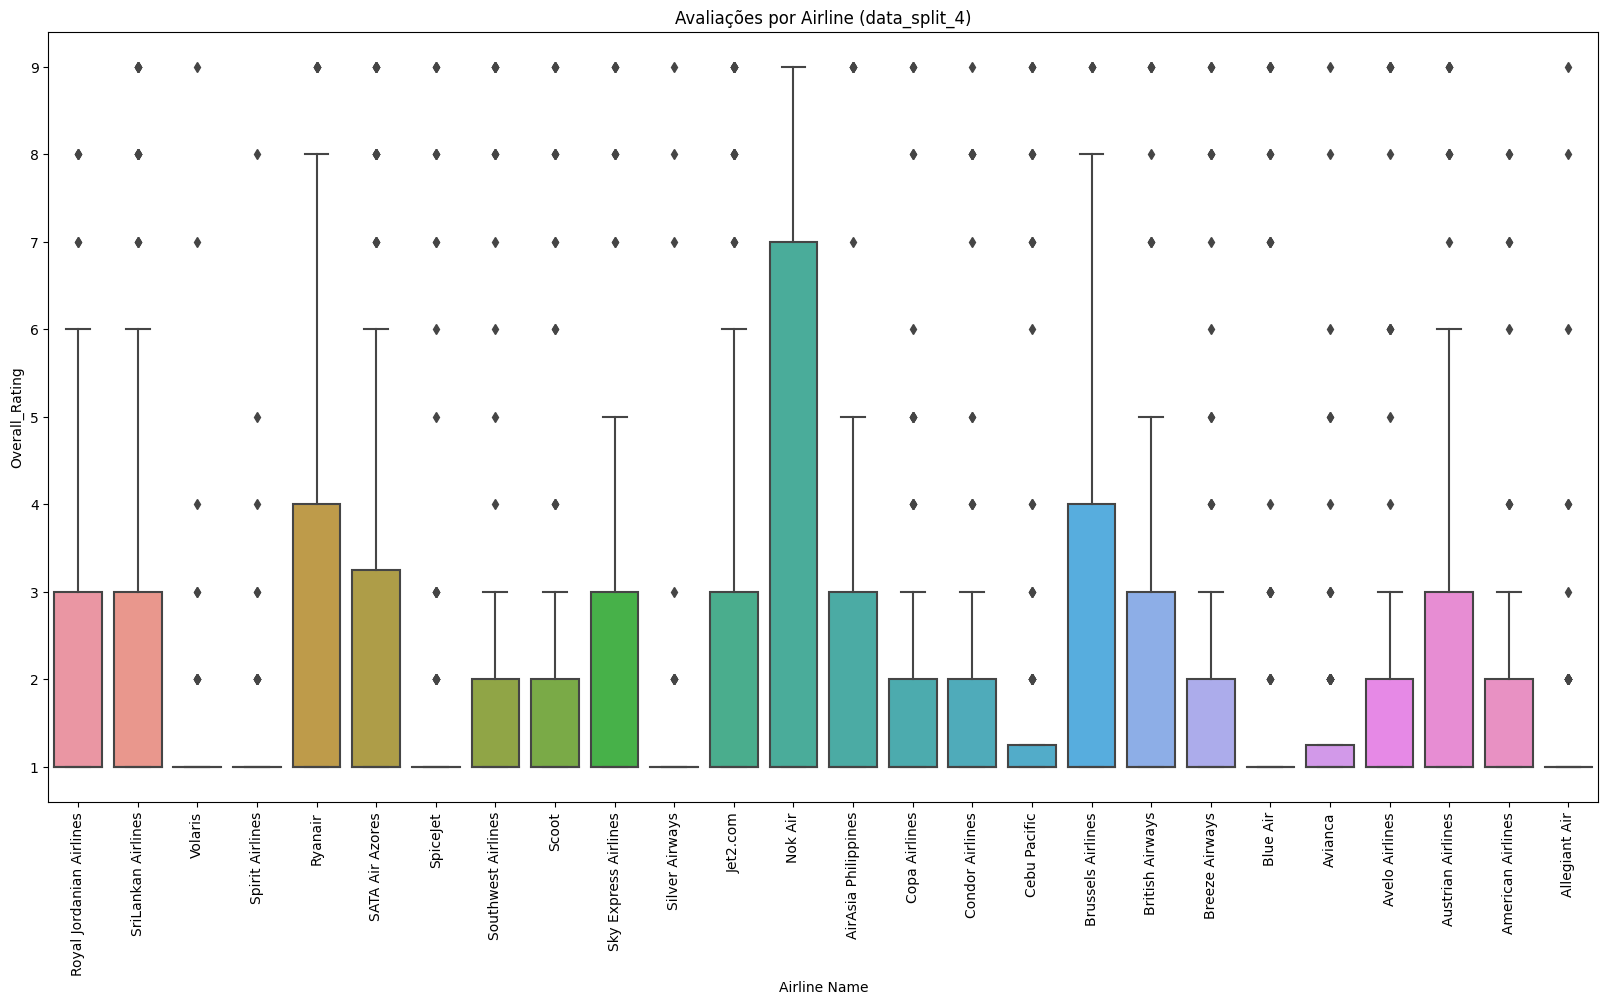

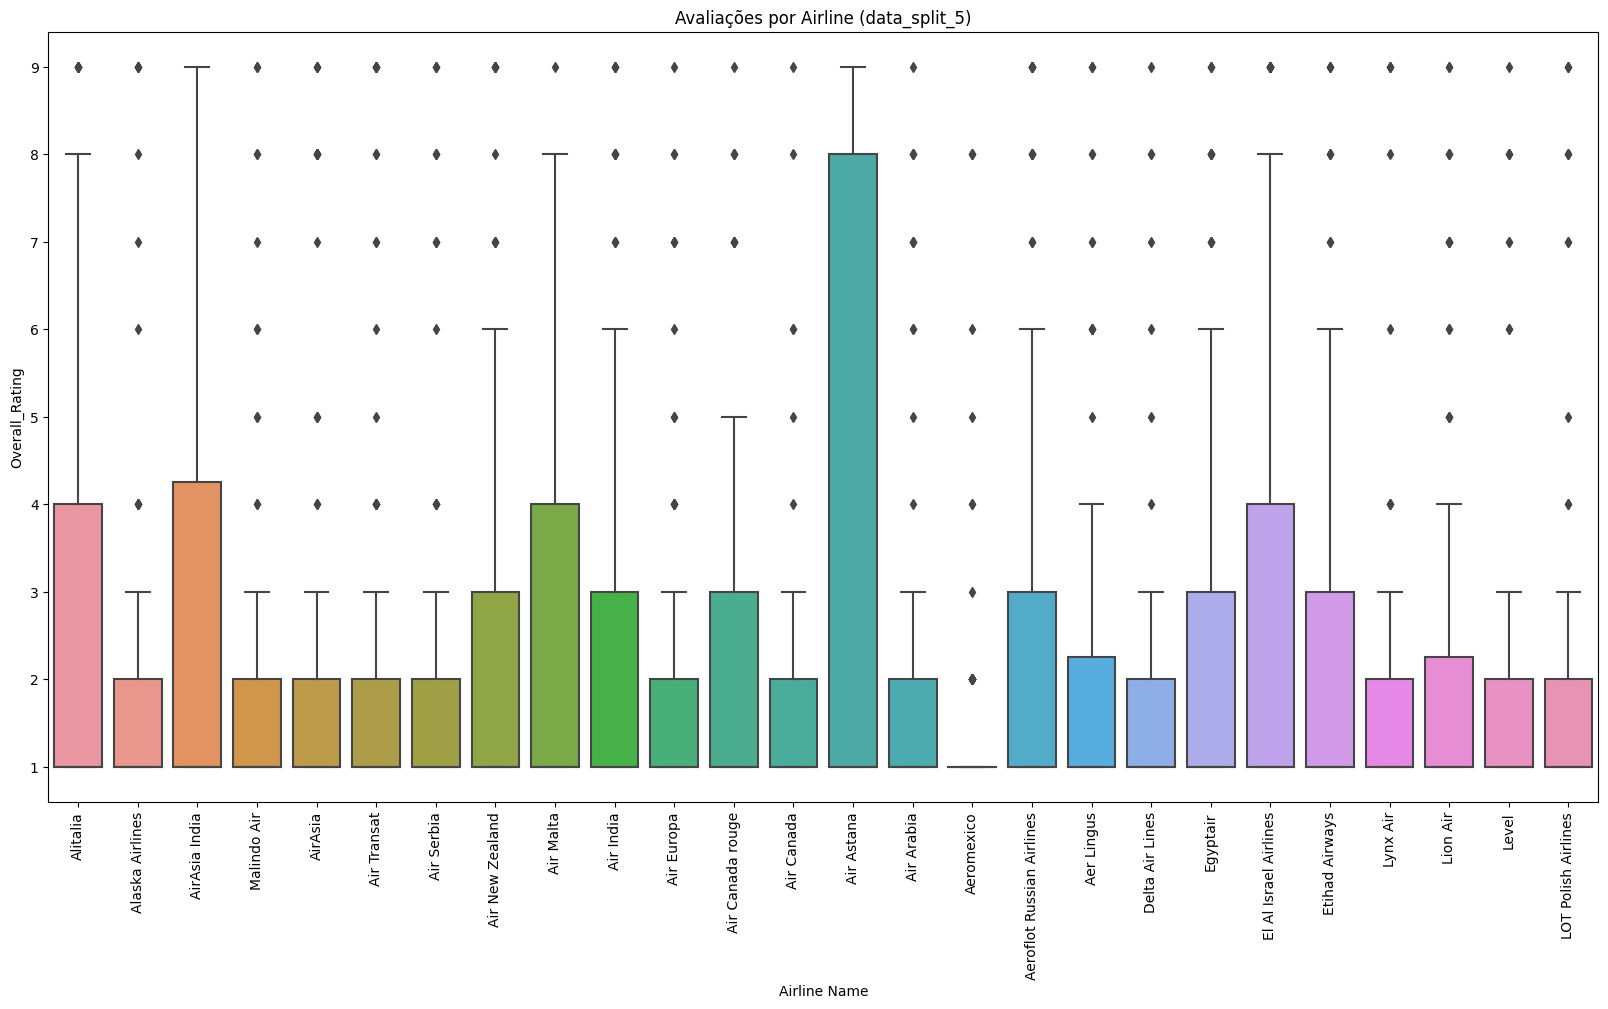

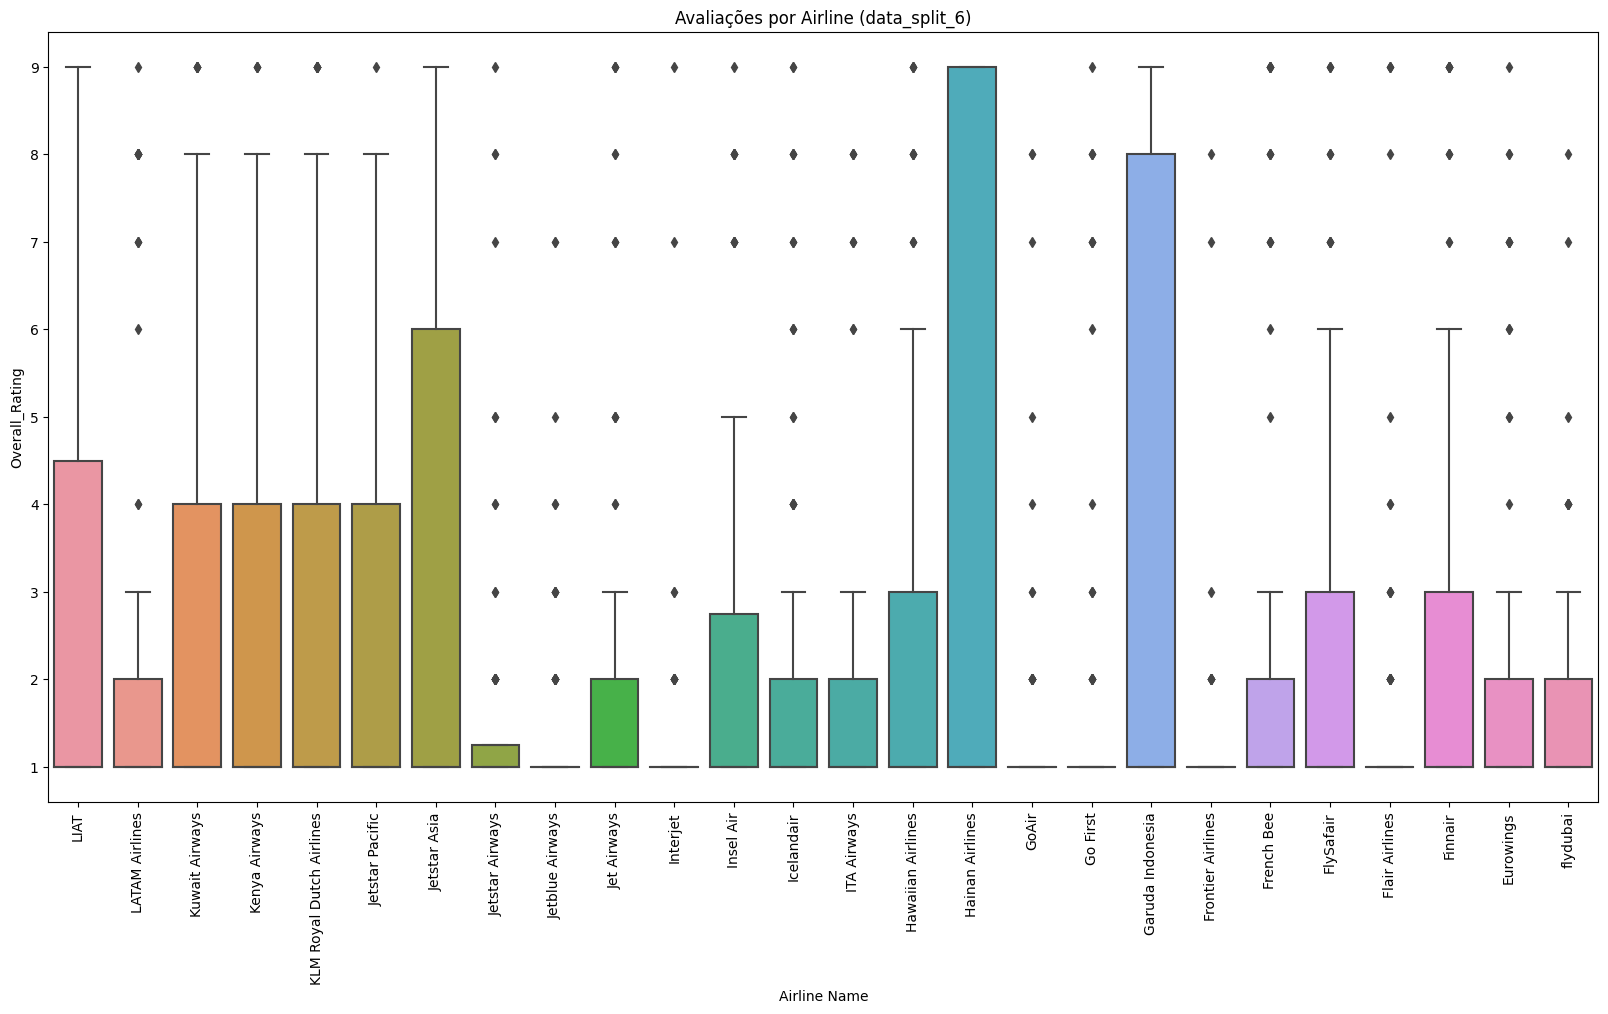

In [149]:
keys = list(dict_dataframes.keys())

# Loop para plotar os boxplots para cada 'split'
for i in range(len(keys)):
    key = keys[i]
    plt.figure(figsize=(20, 10))

    sns.boxplot(
        data=dict_dataframes[key],
        x='Airline Name',
        y='Overall_Rating',
        order=split_ordem[i]  # Usa o índice `i` para acessar a ordem em split_ordem
    )

    plt.xticks(rotation=90)
    plt.title(f'Avaliações por Airline ({key})')
    plt.show()

#### b. Núvem de palavras para diferentes Ratings

In [150]:
## Filtrando o DF TITLE
df_title_over_8 = df_title[df_title['Overall_Rating'] >= 8]

df_title_below_3 = df_title[df_title['Overall_Rating'] <= 3]

## Filtrando o DF FULL REVIEW
df_fullreview_over_8 = df_fullreview[df_fullreview['Overall_Rating'] >= 8]

df_fullreview_below_3 = df_fullreview[df_fullreview['Overall_Rating'] <= 3]

In [151]:
df_fullreview_below_3

,Airline Name,Overall_Rating,tokens_fullreview
1,CityJet,1.0,london city antwerp delayed 3 hour 40 min sure...
5,QantasLink,1.0,friday 13th march flight coffsharbour dubbo fo...
6,Cubana Airlines,2.0,flew varadero toronto april 8 2016. flight sch...
7,SilkAir,3.0,singapore kunming silkair singapore airline pr...
8,Air Berlin,1.0,new york jfk duesseldorf worst service busines...
...,...,...,...
17662,Batik Air,2.0,flight make 1h30min delay departure without em...
17664,Go First,1.0,delhi dehradun pathetic service clear communic...
17665,Gulf Air,1.0,poor service leave bahrain london 9th septembe...
17666,Jetstar Airways,1.0,sydney gold coast please aware sly sneaky busi...


In [152]:
#pip install -U wordcloud 

from wordcloud import WordCloud

In [153]:
## Concatenando os textos em um só 

over_8_title = ' '.join(df_title_over_8['tokens_title'].dropna())

below_3_title = ' '.join(df_title_below_3['tokens_title'].dropna())

over_8_fullreview = ' '.join(df_fullreview_over_8['tokens_fullreview'].dropna())

below_3_fullreview = ' '.join(df_fullreview_below_3['tokens_fullreview'].dropna())

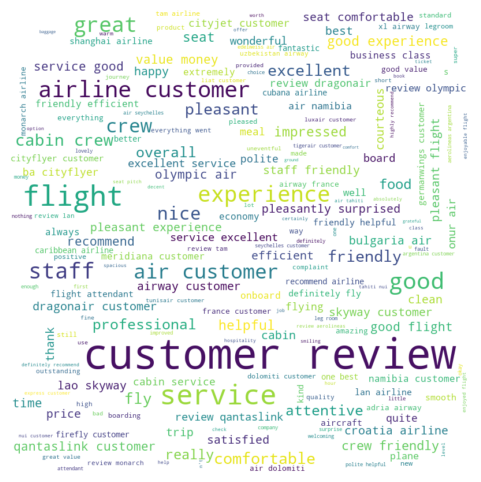

In [154]:
## Títulos para maior que 8
cloud_over_8_title = WordCloud(width = 800, height = 800,
                      background_color = 'white').generate(over_8_title)

plt.figure(figsize=(6, 6))
plt.imshow(cloud_over_8_title, interpolation='bilinear')
plt.axis('off')
plt.show()

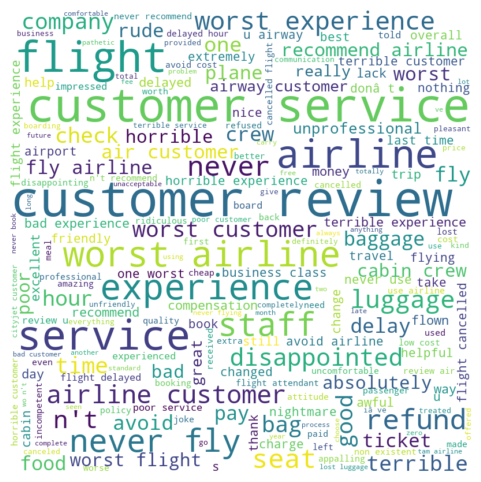

In [155]:
## Títulos para menor que 3
cloud_below_3_title = WordCloud(width = 800, height = 800,
                      background_color = 'white').generate(below_3_title)

plt.figure(figsize=(6, 6))
plt.imshow(cloud_below_3_title, interpolation='bilinear')
plt.axis('off')
plt.show()

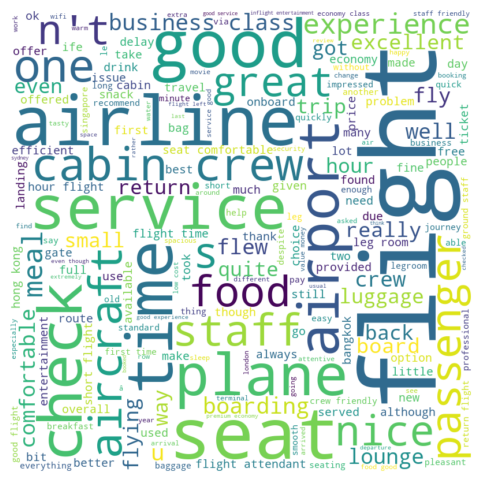

In [156]:
## Review Completa para scores maiores que 8
cloud_over_8_fullreview = WordCloud(width = 800, height = 800,
                      background_color = 'white').generate(over_8_fullreview)

plt.figure(figsize=(6, 6))
plt.imshow(cloud_over_8_fullreview, interpolation='bilinear')
plt.axis('off')
plt.show()

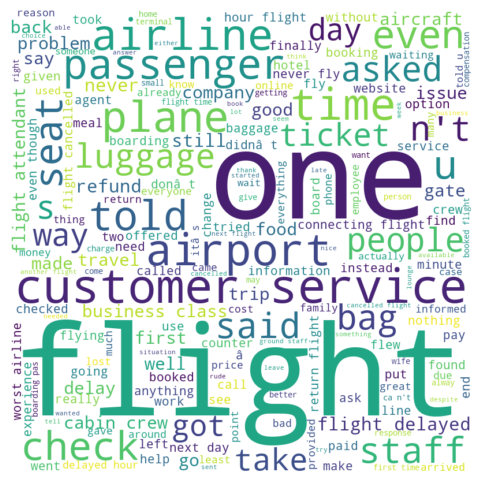

In [157]:
## Review Completa para scores inferiores a 3
cloud_below_3_fullreview = WordCloud(width = 800, height = 800,
                      background_color = 'white').generate(below_3_fullreview)

plt.figure(figsize=(6, 6))
plt.imshow(cloud_below_3_fullreview, interpolation='bilinear')
plt.axis('off')
plt.show()

##### De forma geral, para Reviews Completas com Scores >= 8, vemos que "Serviço", "Tempo", "Vôo", "Tripulação" são bem prevalentes; possivelmente em função do bom desempenho destes fatores levar a boas avaliações;

##### Já para Reviews Completas com Scores >= 3, vemos que palavras diferentes como "Problema", "Reembolso", "Bagagem", "Vôo Cancelado" aparecem com certa frequência.

---------------------------------------------------------------------------------------------------------------------------------------------

#### c. Estudando a correlação entre Overall_rating e as colunas de Rating ('Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity')

In [158]:
data.head(3)

,Airline Name,Overall_Rating,Review_Title,Review Date,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,concat
0,Air Seychelles,8.0,Air Seychelles customer review,10th April 2011,LHR-SEZ-LHR. It's true that there aren't perso...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air SeychellesLHR-SEZ-LHR. It's true that ther...
1,CityJet,1.0,CityJet customer review,10th April 2011,London City to Antwerp was delayed 3 hours 40 ...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CityJetLondon City to Antwerp was delayed 3 ho...
2,Shanghai Airlines,9.0,Shanghai Airlines customer review,10th April 2012,PEK to HGH in Economy. Slight delay out of PEK...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,4.0,NaN,2.0,NaN,Shanghai AirlinesPEK to HGH in Economy. Slight...


In [159]:
## Selecionando as colunas de avaliação
data_select = data[[
    'Overall_Rating','Seat Comfort','Cabin Staff Service','Food & Beverages','Ground Service','Inflight Entertainment','Wifi & Connectivity'
]]

data_select.head()

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,3.0,4.0,4.0,NaN,2.0,NaN
3,8.0,3.0,4.0,0.0,NaN,0.0,NaN
4,7.0,4.0,4.0,4.0,NaN,0.0,NaN


In [160]:
data_select.corr()

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity
Overall_Rating,1.000000,0.472985,0.504694,0.426897,0.554066,0.318719,0.368276
Seat Comfort,0.472985,1.000000,0.746833,0.717835,0.706039,0.632447,0.669766
Cabin Staff Service,0.504694,0.746833,1.000000,0.764980,0.706804,0.602420,0.629704
Food & Beverages,0.426897,0.717835,0.764980,1.000000,0.681730,0.684328,0.696744
Ground Service,0.554066,0.706039,0.706804,0.681730,1.000000,0.615050,0.639529
Inflight Entertainment,0.318719,0.632447,0.602420,0.684328,0.615050,1.000000,0.770955
Wifi & Connectivity,0.368276,0.669766,0.629704,0.696744,0.639529,0.770955,1.000000


Text(0.5, 1.0, 'Matriz de Correlação entre Rating Geral e Outros Ratings')

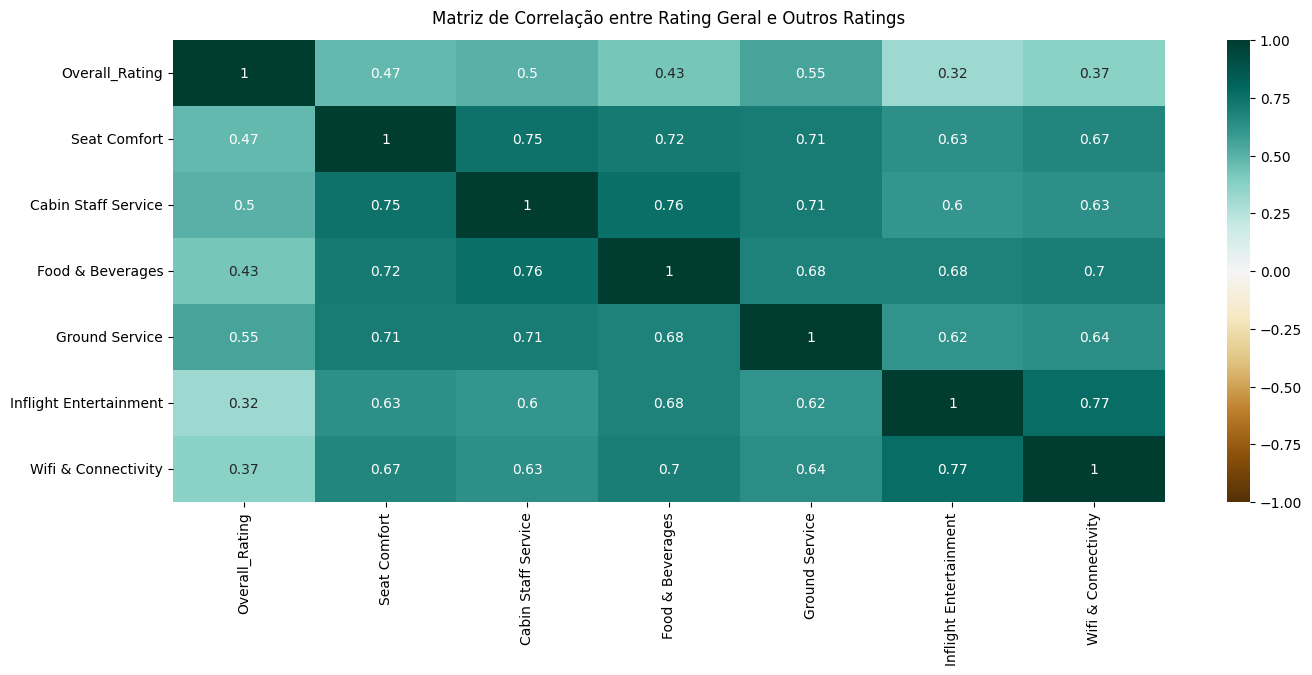

In [161]:
## Fazendo um heatmap a partir da matriz de correlação

plt.figure(figsize = (16,6))

heatmap = sns.heatmap(data_select.corr(), vmin = -1, vmax = 1, annot = True, cmap='BrBG')

heatmap.set_title('Matriz de Correlação entre Rating Geral e Outros Ratings', fontdict = {'fontsize':12}, pad = 12)

#### 4. Fazendo uma Análise de Sentimento; Uma regressão Linear para determinar Scores e comparando com o que já é determinado por 'Overall_Ratings'

##### Reg. Linear

In [162]:
## Regressão Linear:

## Olhando a matriz de correlação; vou optar por escolher somente três features para esta regressão linear:
    ## Para evitar overfitting, tendo em vista a alta correlação entre eles.

    # Os features serão: 'Ground Service', 'Cabin Staff Service', e 'Inflight Entertainment'

## Primeiro, criando o score "Positivo", "Neutro" e "Negativo" no Overall_Rating

data_lin = data_select.copy()

data_lin['Scores'] = np.where(
    data_lin['Overall_Rating'] > 7, 'Positivo', np.where(
        data_lin['Overall_Rating'] < 4, 'Negativo', 'Neutro'
    )
)

data_lin.head()

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Scores
0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,Positivo
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Negativo
2,9.0,3.0,4.0,4.0,NaN,2.0,NaN,Positivo
3,8.0,3.0,4.0,0.0,NaN,0.0,NaN,Positivo
4,7.0,4.0,4.0,4.0,NaN,0.0,NaN,Neutro


In [163]:
import statsmodels.api as sm

data_lin_dropped = data_lin.dropna()

y = data_lin_dropped['Overall_Rating']
X = data_lin_dropped[['Ground Service', 'Inflight Entertainment', 'Cabin Staff Service']]

## Fazendo o modelo de reg.lin.

reglin = sm.OLS(y, X).fit()
preds = reglin.predict(X)

reglin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Overall_Rating   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              3182.
Date:                Sun, 15 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:02:32   Log-Likelihood:                         -9915.8
No. Observations:                4766   AIC:                                  1.984e+04
Df Residuals:                    4763   BIC:                                  1.986e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Ground Service             0.5851      0.028     21.275      0.000       0.531       0.639
Inflight Entertainment     0.0556      0.028      1.989      0.047       0.001       0.110
Cabin Staff Service        0.4186      0.026     16.296      0.000       0.368       0.469
==============================================================================
Omnibus:                       90.198   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.837
Skew:                           0.107   Prob(JB):                     8.00e-38
Kurtosis:                       3.903   Cond. No.                         5.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
## Temos um R² razoável, com explicabilidade de 67%
## O teste-f também aponta um score bom, com significância a 1%

## fazendo o assign ao DF para criar uma regra de positivo negativo e avaliar a real eftividade

data_lin_final = data_lin_dropped.assign(
    predicao = round(preds)
)

data_lin_final['Scores_reglin'] = np.where(
    data_lin_final['predicao'] > 7, 'Positivo', np.where(
        data_lin_final['predicao'] < 4, 'Negativo', 'Neutro'
    )
)

data_lin_final['Comp_TF'] = data_lin_final['Scores'] == data_lin_final['Scores_reglin']

data_lin_final.head()

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Scores,predicao,Scores_reglin,Comp_TF
10,1.0,5.0,5.0,5.0,5.0,2.0,2.0,Negativo,5.0,Neutro,False
15,2.0,1.0,3.0,1.0,2.0,4.0,1.0,Negativo,3.0,Negativo,True
21,1.0,1.0,2.0,1.0,1.0,1.0,1.0,Negativo,1.0,Negativo,True
22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Negativo,1.0,Negativo,True
26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Negativo,1.0,Negativo,True


In [165]:
## Avaliando a assertividade do Modelo de Regressão Linear Multivariada

data_lin_final['Comp_TF'].mean() 

## Com isso, calculando uma assertividade de 75,7%, o que me parece bem razoável para uma Regressão Linear

0.7570289550986152

#### Análise de Sentimento

In [166]:
## Apenas testando o funcionamento do cálculo
test = [-1, 0, 1]
test_7 = []
for n in test:

    test_7.append((((n+1)/2)*9)+1)
    
test_7

[1.0, 5.5, 10.0]

In [167]:
## Inicializando o Analyzer no NLTK

analyzer = SentimentIntensityAnalyzer()

## Função sentimento

def sent_analise(text):
    scores = analyzer.polarity_scores(text)
    sentimentos = (((scores['compound']+1)/2)*9)+1 ## Cálculo para transformar o score (-1 a 1) em uma escala de 1 a 10
    return sentimentos

In [168]:
df_fullreview.head()

,Airline Name,Overall_Rating,tokens_fullreview
0,Air Seychelles,8.0,lhr-sez-lhr 's true n't personal tv like virgi...
1,CityJet,1.0,london city antwerp delayed 3 hour 40 min sure...
2,Shanghai Airlines,9.0,pek hgh economy slight delay pek otherwise une...
3,Aerolineas Argentinas,8.0,rio buenos aire aep 737. departure delayed 30m...
4,Adria Airways,7.0,outbound flight fra/prn a319 2 hour 10 min fli...


In [169]:
## Aplicando somente nas palavras de "Full Review", como acho que são mais apropriadas
    # Os títulos parecem conter muitas palavras pouco úteis para se compreender o contexto das Reviews

review_scored = df_fullreview.copy()

review_scored['predicao'] = review_scored['tokens_fullreview'].apply(sent_analise)

In [170]:
review_scored['Scores_sent'] = np.where(
    review_scored['predicao'].round() > 7, 'Positivo', np.where(
        review_scored['predicao'].round() < 4, 'Negativo', 'Neutro'
    )
)

review_scored['Scores'] = np.where(
    review_scored['Overall_Rating'] > 7, 'Positivo', np.where(
        review_scored['Overall_Rating'] < 4, 'Negativo', 'Neutro'
    )
)

review_scored['Comp_TF'] = review_scored['Scores'] == review_scored['Scores_sent']

review_scored.head()

,Airline Name,Overall_Rating,tokens_fullreview,predicao,Scores_sent,Scores,Comp_TF
0,Air Seychelles,8.0,lhr-sez-lhr 's true n't personal tv like virgi...,7.06915,Neutro,Positivo,False
1,CityJet,1.0,london city antwerp delayed 3 hour 40 min sure...,2.48275,Negativo,Negativo,True
2,Shanghai Airlines,9.0,pek hgh economy slight delay pek otherwise une...,6.62500,Neutro,Positivo,False
3,Aerolineas Argentinas,8.0,rio buenos aire aep 737. departure delayed 30m...,8.73280,Positivo,Positivo,True
4,Adria Airways,7.0,outbound flight fra/prn a319 2 hour 10 min fli...,8.13655,Positivo,Neutro,False


In [171]:
## Avaliando a assertividade do Modelo de Regressão Linear Multivariada

review_scored['Comp_TF'].mean() 

## Aqui obtivemos um resultado de 50%, o que não é muito positivo
    # mas é melhor do que 33%, que seria a base considerando uma mesma chance de chutar cada 'classe'.

0.4980192416525184

In [172]:
## Usando keywords para associar atraso a NPS.
palavras_chave = ['delay', 'delayed', 'late', 'postponed', 'rescheduled','scheduled']

def in_keywords(text, keywords): 
    return any(keyword in text.lower() for keyword in keywords) ## Função que retorna True se houver qualquer palavra chave no texto de Review

In [173]:
review_scored

,Airline Name,Overall_Rating,tokens_fullreview,predicao,Scores_sent,Scores,Comp_TF
0,Air Seychelles,8.0,lhr-sez-lhr 's true n't personal tv like virgi...,7.06915,Neutro,Positivo,False
1,CityJet,1.0,london city antwerp delayed 3 hour 40 min sure...,2.48275,Negativo,Negativo,True
2,Shanghai Airlines,9.0,pek hgh economy slight delay pek otherwise une...,6.62500,Neutro,Positivo,False
3,Aerolineas Argentinas,8.0,rio buenos aire aep 737. departure delayed 30m...,8.73280,Positivo,Positivo,True
4,Adria Airways,7.0,outbound flight fra/prn a319 2 hour 10 min fli...,8.13655,Positivo,Neutro,False
...,...,...,...,...,...,...,...
17665,Gulf Air,1.0,poor service leave bahrain london 9th septembe...,1.91620,Negativo,Negativo,True
17666,Jetstar Airways,1.0,sydney gold coast please aware sly sneaky busi...,6.36850,Neutro,Negativo,False
17667,LOT Polish Airlines,1.0,berlin warsaw via delhi try avoid airline much...,1.17505,Negativo,Negativo,True
17668,Volotea,7.0,volotea nice low-cost company price low attrac...,8.24365,Positivo,Neutro,False


In [174]:
review_scored['atraso_mask'] = review_scored['tokens_fullreview'].apply(lambda x: in_keywords(x, palavras_chave))

review_scored['atraso_mask'] = review_scored['atraso_mask'].apply(lambda x: 'Atrasado' if x == True else 'Pontual')

review_scored.head()

,Airline Name,Overall_Rating,tokens_fullreview,predicao,Scores_sent,Scores,Comp_TF,atraso_mask
0,Air Seychelles,8.0,lhr-sez-lhr 's true n't personal tv like virgi...,7.06915,Neutro,Positivo,False,Pontual
1,CityJet,1.0,london city antwerp delayed 3 hour 40 min sure...,2.48275,Negativo,Negativo,True,Atrasado
2,Shanghai Airlines,9.0,pek hgh economy slight delay pek otherwise une...,6.62500,Neutro,Positivo,False,Atrasado
3,Aerolineas Argentinas,8.0,rio buenos aire aep 737. departure delayed 30m...,8.73280,Positivo,Positivo,True,Atrasado
4,Adria Airways,7.0,outbound flight fra/prn a319 2 hour 10 min fli...,8.13655,Positivo,Neutro,False,Pontual


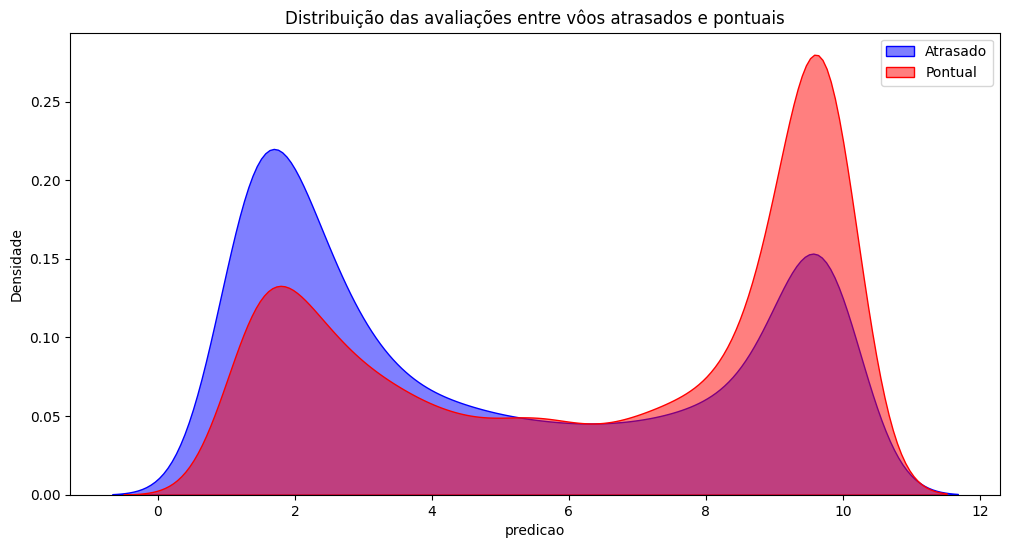

In [175]:
## Fazendo um gráficos de KDE para uma melhor visualização

plt.figure(figsize = (12,6))

sns.kdeplot(
    data = review_scored[review_scored['atraso_mask'] == 'Atrasado'],
    x = 'predicao',
    fill = True,
    color = 'Blue',
    label = 'Atrasado',
    alpha = 0.5
)

sns.kdeplot(
    data = review_scored[review_scored['atraso_mask'] == 'Pontual'],
    x = 'predicao',
    fill = True,
    color = 'Red',
    label = 'Pontual',
    alpha = 0.5
)

plt.title('Distribuição das avaliações entre vôos atrasados e pontuais')
plt.ylabel('Densidade')
plt.legend()

plt.show()

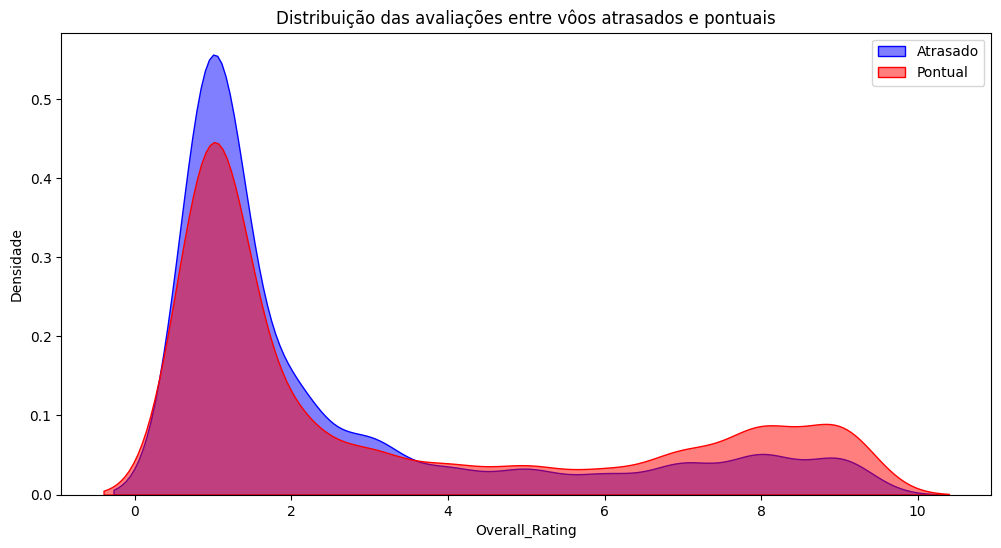

In [176]:
## Fazendo um gráficos de KDE para uma melhor visualização

plt.figure(figsize = (12,6))

sns.kdeplot(
    data = review_scored[review_scored['atraso_mask'] == 'Atrasado'],
    x = 'Overall_Rating',
    fill = True,
    color = 'Blue',
    label = 'Atrasado',
    alpha = 0.5
)

sns.kdeplot(
    data = review_scored[review_scored['atraso_mask'] == 'Pontual'],
    x = 'Overall_Rating',
    fill = True,
    color = 'Red',
    label = 'Pontual',
    alpha = 0.5
)

plt.title('Distribuição das avaliações entre vôos atrasados e pontuais')
plt.ylabel('Densidade')
plt.legend()

plt.show()

#### Ao olhar para este gráficos, me parece que vôos ponuais têm uma cauda direita mais 'gorda', o que pode implicar em diferenças entre os dados.
#### Vale um teste de hipótese!

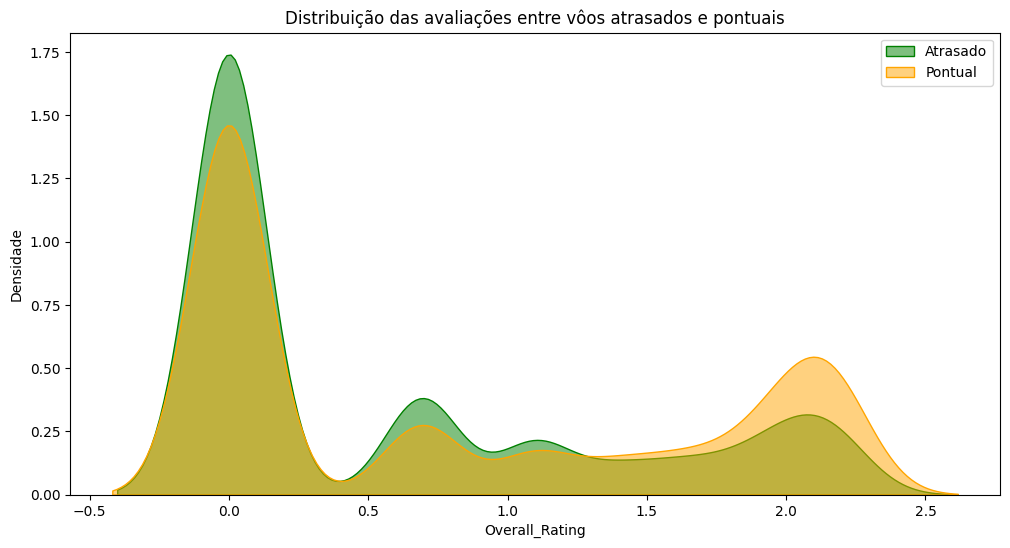

In [177]:
## Aplicando log para normalizar
review_scored_log = review_scored.copy()
review_scored_log['Overall_Rating'] = np.log(review_scored_log['Overall_Rating'])

plt.figure(figsize = (12,6))

sns.kdeplot(
    data = review_scored_log[review_scored_log['atraso_mask'] == 'Atrasado'],
    x = 'Overall_Rating',
    fill = True,
    color = 'Green',
    label = 'Atrasado',
    alpha = 0.5
)

sns.kdeplot(
    data = review_scored_log[review_scored_log['atraso_mask'] == 'Pontual'],
    x = 'Overall_Rating',
    fill = True,
    color = 'Orange',
    label = 'Pontual',
    alpha = 0.5
)

plt.title('Distribuição das avaliações entre vôos atrasados e pontuais')
plt.ylabel('Densidade')
plt.legend()

plt.show()

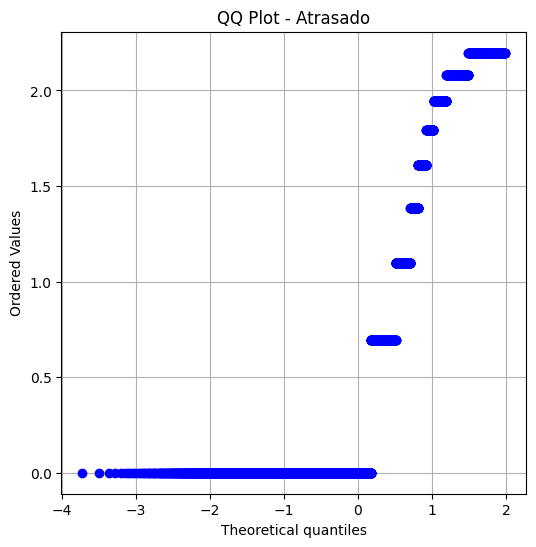

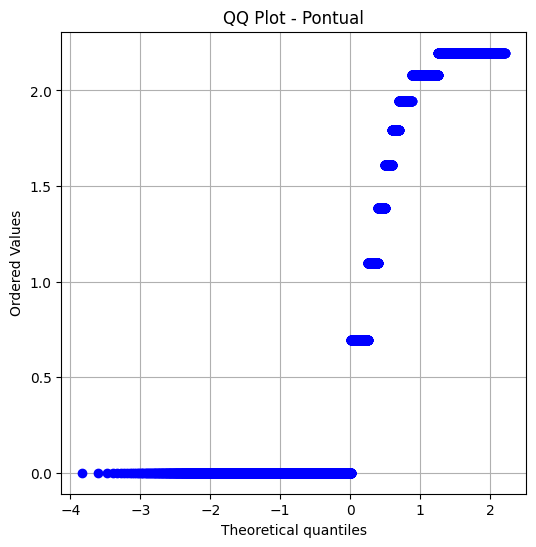

In [178]:
import scipy.stats as stats

# QQ plot para atrasado
plt.figure(figsize=(6,6))
stats.probplot(review_scored_log[review_scored_log['atraso_mask'] == 'Atrasado']['Overall_Rating'], dist="norm", plot=plt)
plt.title('QQ Plot - Atrasado')
plt.grid(True)
plt.show()

# QQ plot para pontual
plt.figure(figsize=(6,6))
res = stats.probplot(review_scored_log[review_scored_log['atraso_mask'] == 'Pontual']['Overall_Rating'], dist="norm", plot=plt)
plt.title('QQ Plot - Pontual')
plt.grid(True)
plt.show()

## Definitivament não normais.

In [179]:
## Teremos que fazer um teste não-paramétrico - Teste U de Mann-Whitney

# H0: Não há diferença entre os scores em vôos atrasados e em vôos pontuais

# Ha: Há diferença entre os scores em vôos atrasados e em vôos pontuais

atrasado = review_scored[review_scored['atraso_mask'] == 'Atrasado']['Overall_Rating'].dropna()
pontual = review_scored[review_scored['atraso_mask'] == 'Pontual']['Overall_Rating'].dropna()

a = stats.mannwhitneyu(
    pontual,
    atrasado
)

print(a)

if a[1] < 0.05:
    print(f'Rejeitamos a H0, visto que o p-valor de {a[1]} é inferior a 5%: Há diferenças significativas entre os scores em função do atraso')
else:
    print(f'Com o p-valor de {a[1]} podemos inferir que não há diferenças significativas entre scores dados a vôos atrasados e a vôos pontuais')

MannwhitneyuResult(statistic=39958462.0, pvalue=7.346862793947261e-44)
Rejeitamos a H0, visto que o p-valor de 7.346862793947261e-44 é inferior a 5%: Há diferenças significativas entre os scores em função do atraso


#### De forma Geral, aferimos que a presença de atrasos nos vôos pode ser um bom preditor do score das companhias

In [180]:
## Vamos aplicar isto para as 3 Empresas aleatórias

random_companies = review_scored['Airline Name'].sample(n=3, random_state = 1603)

print(random_companies)

6369         Adria Airways
11954    American Airlines
13765      Xiamen Airlines
Name: Airline Name, dtype: object


In [181]:
# Filtrando somente as 3 primeiras companhias
review_company = review_scored[review_scored['Airline Name'].isin(random_companies)]

In [186]:
random_companies = list(random_companies)

In [188]:
# Fazendo o segundo split, por companhias.
review_company_0 = review_company[review_company['Airline Name'] == random_companies[0]]

review_company_1 = review_company[review_company['Airline Name'] == random_companies[1]]

review_company_2 = review_company[review_company['Airline Name'] == random_companies[2]]

review_company_0.head()

,Airline Name,Overall_Rating,tokens_fullreview,predicao,Scores_sent,Scores,Comp_TF,atraso_mask
4,Adria Airways,7.0,outbound flight fra/prn a319 2 hour 10 min fli...,8.13655,Positivo,Neutro,False,Pontual
212,Adria Airways,6.0,lodz paris cdg munich lodz adria airway decent...,9.65800,Positivo,Neutro,False,Pontual
291,Adria Airways,7.0,istanbul-ljubljana-munich return pre-take sect...,9.79525,Positivo,Neutro,False,Atrasado
393,Adria Airways,9.0,lju fra back flight time flight made crj900 ne...,9.79840,Positivo,Positivo,True,Pontual
446,Adria Airways,1.0,two short flight adria airway ljubljana vienna...,9.67915,Positivo,Negativo,False,Pontual


In [193]:
atrasado_0 = review_company_0[review_company_0['atraso_mask'] == 'Atrasado']['Overall_Rating'].dropna()
pontual_0 = review_company_0[review_company_0['atraso_mask'] == 'Pontual']['Overall_Rating'].dropna()

a_0 = stats.mannwhitneyu(
    pontual_0,
    atrasado_0
)

print(a_0)

if a_0[1] < 0.05:
    print(f'Rejeitamos a H0, visto que o p-valor de {a_0[1]} é inferior a 5%')
else:
    print(f'Com o p-valor de {a_0[1]} podemos inferir que não há diferenças significativas entre scores dados a vôos atrasados e a vôos pontuais')

MannwhitneyuResult(statistic=876.0, pvalue=0.009075821859308915)
Rejeitamos a H0, visto que o p-valor de 0.009075821859308915 é inferior a 5%


In [194]:
atrasado_1 = review_company_1[review_company_1['atraso_mask'] == 'Atrasado']['Overall_Rating'].dropna()
pontual_1 = review_company_1[review_company_1['atraso_mask'] == 'Pontual']['Overall_Rating'].dropna()

a_1 = stats.mannwhitneyu(
    pontual_1,
    atrasado_1
)

print(a_1)

if a_1[1] < 0.05:
    print(f'Rejeitamos a H0, visto que o p-valor de {a_1[1]} é inferior a 5%')
else:
    print(f'Com o p-valor de {a_1[1]} podemos inferir que não há diferenças significativas entre scores dados a vôos atrasados e a vôos pontuais')

MannwhitneyuResult(statistic=1071.0, pvalue=0.7625217297030643)
Com o p-valor de 0.7625217297030643 podemos inferir que não há diferenças significativas entre scores dados a vôos atrasados e a vôos pontuais


In [195]:
atrasado_2 = review_company_2[review_company_2['atraso_mask'] == 'Atrasado']['Overall_Rating'].dropna()
pontual_2 = review_company_2[review_company_2['atraso_mask'] == 'Pontual']['Overall_Rating'].dropna()

a_2 = stats.mannwhitneyu(
    pontual_2,
    atrasado_2
)

print(a_2)

if a_2[1] < 0.05:
    print(f'Rejeitamos a H0, visto que o p-valor de {a_2[1]} é inferior a 5%')
else:
    print(f'Com o p-valor de {a_2[1]} podemos inferir que não há diferenças significativas entre scores dados a vôos atrasados e a vôos pontuais')

MannwhitneyuResult(statistic=1257.5, pvalue=0.15590297772589864)
Com o p-valor de 0.15590297772589864 podemos inferir que não há diferenças significativas entre scores dados a vôos atrasados e a vôos pontuais


#### Ainda que sem calcular o NPS, vemos que só há validade para está inferência acerca dos Scores para algumas companhias.
#### Para outras, é possível que a causa seja outra

In [197]:
# Criando uma função de cáculo nps
def nps_calc(group):
    total = len(group)
    positivo_perc = (group['Scores'] == 'Positivo').sum() / total * 100
    negativo_perc = (group['Scores'] == 'Negativo').sum() / total * 100
    nps = positivo_perc - negativo_perc
    return pd.Series({'NPS': nps})

In [200]:
## Calculando NPS

review_company_0_nps = review_company_0.groupby('atraso_mask').apply(nps_calc).reset_index()

print(review_company_0_nps)

  atraso_mask        NPS
0    Atrasado -48.275862
1     Pontual   6.451613


In [202]:
## Calculando NPS

review_company_1_nps = review_company_1.groupby('atraso_mask').apply(nps_calc).reset_index()

print(review_company_1_nps)

  atraso_mask        NPS
0    Atrasado -89.552239
1     Pontual -90.909091


In [201]:
## Calculando NPS

review_company_2_nps = review_company_2.groupby('atraso_mask').apply(nps_calc).reset_index()

print(review_company_2_nps)

  atraso_mask        NPS
0    Atrasado -41.935484
1     Pontual  -5.797101


#### Podemos ver que os resultados do teste de Hipótese têm certa validade frente à análise do NPS de fato.